In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv("Parkinsson disease.csv")
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
X = df.drop(columns=(['status','name']),axis=1)
Y = df.status

In [6]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [7]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train.shape

(156, 22)

In [11]:
X_test.shape

(39, 22)

In [12]:
#LOGISTIC REGRESSION

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import fetch_openml
# Load Parkinson's dataset
parkinsons = fetch_openml(name='parkinsons', version=1)
data = pd.DataFrame(data=parkinsons.data, columns=parkinsons.feature_names)
data['target'] = parkinsons.target

In [15]:
# Selct relevant features and target
X = data.drop('target', axis=1)
y = data['target']

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\RACY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred = model.predict(X_test)

In [19]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Classification report
class_report = classification_report(y_test, y_pred)

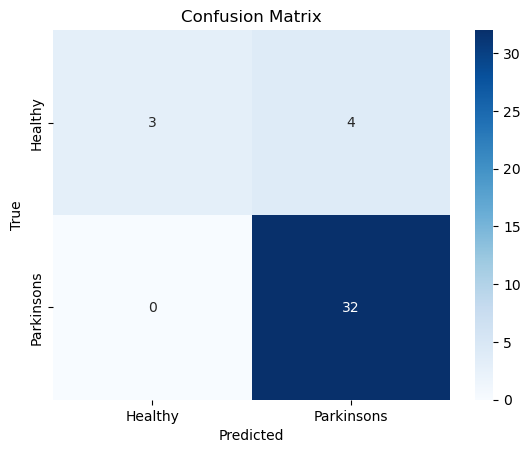

In [21]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
xticklabels=['Healthy', 'Parkinsons'], yticklabels=['Healthy', 'Parkinsons'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [22]:
print("\nClassification Report:\n",class_report)


Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.43      0.60         7
           2       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



In [23]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [25]:
data = pd.read_csv('Parkinsson disease.csv')

In [26]:
X = data[['spread1', 'spread2']].values
y = data['status'].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [29]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

In [30]:
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [32]:
X_set, y_set = sc.inverse_transform(X_train), y_train

In [34]:
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].
max() + 10, step=0.25),np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].
max() + 1000, step=0.25))

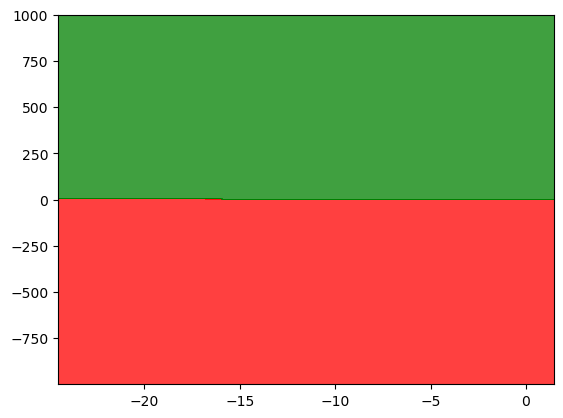

In [35]:
#Contour Plot
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.
ravel()]).T)).reshape(X1.shape),
alpha=0.75, cmap=ListedColormap(('red', 'green')))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


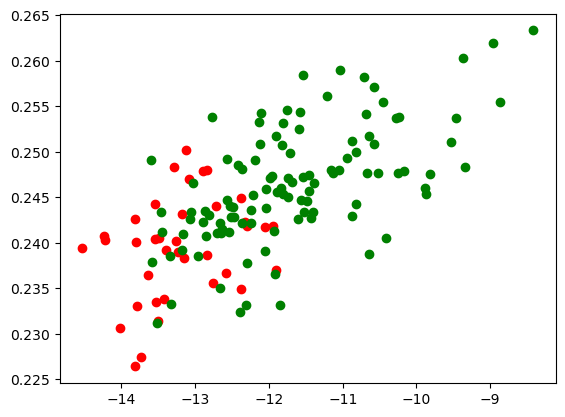

In [44]:
# Scatter Plot
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('red', 'green'))(i), label=str(j))

In [46]:
#SUPPORT VECTOR MACHINE

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn import datasets

In [49]:
# Assuming 'status' is the target column and 'spread1' and 'spread2' are features
X = data[['spread1', 'spread2']].values
y = data['status'].values

In [50]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [51]:
# Feature scaling using StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [52]:
# Train the Support Vector Machine
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [53]:
# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

In [54]:
# Evaluate the performance of the SVM
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [55]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.92
Confusion Matrix:
[[ 7  4]
 [ 0 38]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.90      1.00      0.95        38

    accuracy                           0.92        49
   macro avg       0.95      0.82      0.86        49
weighted avg       0.93      0.92      0.91        49



In [56]:
# Plot the decision boundary
h = .02 # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

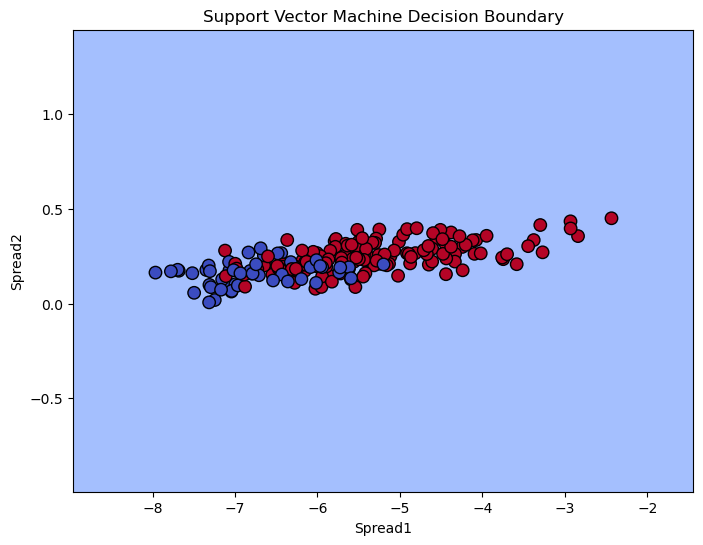

In [58]:
# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k',marker='o', s=80)
plt.title('Support Vector Machine Decision Boundary')
plt.xlabel('Spread1')
plt.ylabel('Spread2')
plt.show()

In [59]:
#NAIVE BAYES

In [60]:
from sklearn.naive_bayes import GaussianNB
# Assuming 'status' is the target column and 'spread1' and 'spread2' are features
X = data[['spread1', 'spread2']].values
y = data['status'].values

In [ ]:
# Split the ataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
random_state=42)

In [61]:
# Feature scaling using StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

In [62]:
# Train the Naive Bayes model
classifier = GaussianNB()
classifier.fit(X_train_scaled, y_train)

GaussianNB()

In [67]:
# Create a meshgrid for plotting the decision boundary
X1, X2 = np.meshgrid(np.arange(start=X_train_scaled[:, 0].min() - 1,stop=X_train_scaled[:, 0].max() + 1, step=0.01),
np.arange(start=X_train_scaled[:, 1].min() - 1,stop=X_train_scaled[:, 1].max() + 1, step=0.01))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


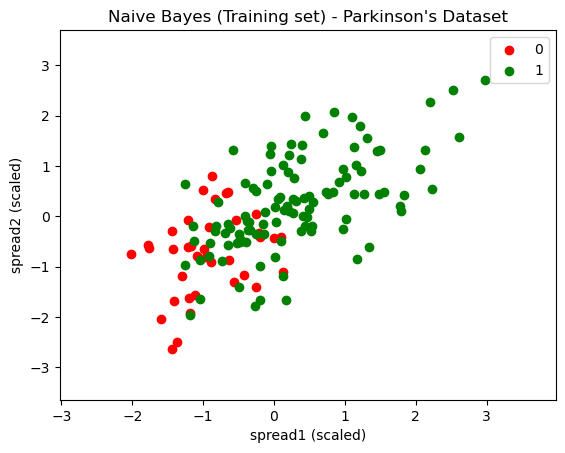

In [71]:
# Scatter plot of the training set
for i, j in enumerate(np.unique(y_train)):
     plt.scatter(X_train_scaled[y_train == j, 0], X_train_scaled[y_train == j,1],
     c=ListedColormap(('red', 'green'))(i), label=str(j))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Naive Bayes (Training set) - Parkinson\'s Dataset')
plt.xlabel('spread1 (scaled)')
plt.ylabel('spread2 (scaled)')
plt.legend()
plt.show()

In [72]:
#GaussianNB

In [73]:
X = data[['spread1', 'spread2']].values
y = data['status'].values
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [74]:
# Feature scaling using StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

In [75]:
# Train the Naive Bayes model
classifier = GaussianNB()
classifier.fit(X_train_scaled, y_train)

GaussianNB()

In [76]:
X_test_scaled = sc.transform(X_test)

In [77]:
# Create a meshgrid for plotting the decision boundary
X1, X2 = np.meshgrid(np.arange(start=X_test_scaled[:, 0].min() - 1,stop=X_test_scaled[:, 0].max() + 1, step=0.01),np.arange(start=X_test_scaled[:, 1].min() - 1,stop=X_test_scaled[:, 1].max() + 1, step=0.01))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


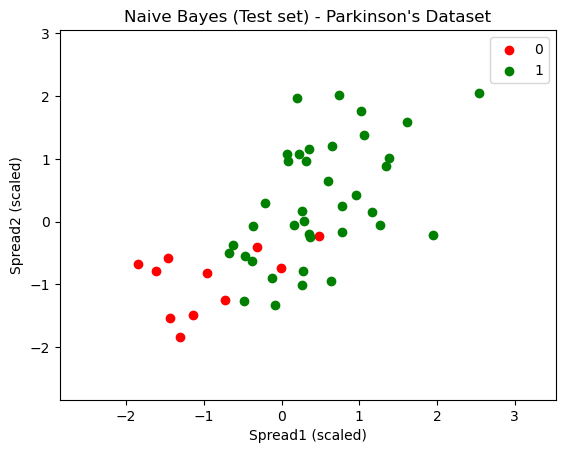

In [83]:
# Scatter plot of the test set
for i, j in enumerate(np.unique(y_test)):
  plt.scatter(X_test_scaled[y_test == j, 0], X_test_scaled[y_test == j, 1],
  c=ListedColormap(('red', 'green'))(i), label=str(j))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Naive Bayes (Test set) - Parkinson\'s Dataset')
plt.xlabel('Spread1 (scaled)')
plt.ylabel('Spread2 (scaled)')
plt.legend()
plt.show()

In [84]:
#RANDOM FOREST

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Assuming 'status' is the target column and 'spread1' and 'spread2' are features
X = data[['spread1', 'spread2']].values
y = data['status'].values

In [88]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [89]:
# Feature scaling using StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [90]:
# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [91]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

In [92]:
# Evaluate the performance of the Random Forest
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [93]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.92
Confusion Matrix:
[[ 8  3]
 [ 1 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.93      0.97      0.95        38

    accuracy                           0.92        49
   macro avg       0.91      0.85      0.87        49
weighted avg       0.92      0.92      0.92        49



In [94]:
# Plot the decision boundary (for visualization purposes)
h = .02 # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

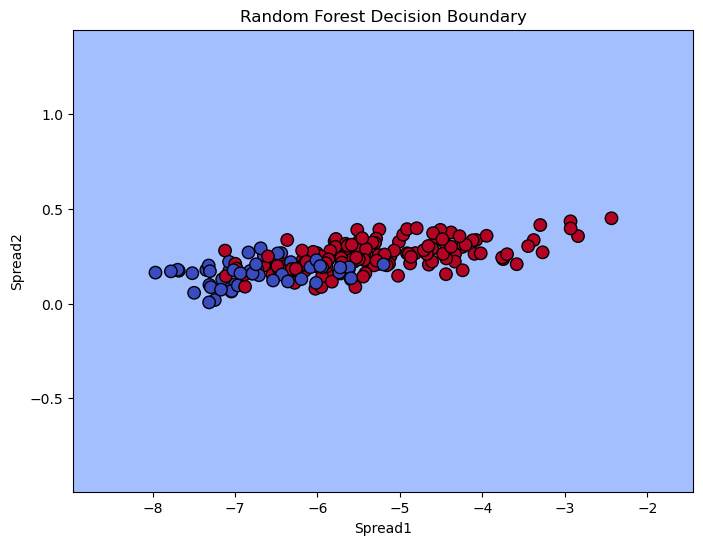

In [96]:
# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k',marker='o', s=80)
plt.title('Random Forest Decision Boundary')
plt.xlabel('Spread1')
plt.ylabel('Spread2')
plt.show()

In [97]:
#K-NEAREST NEIGHBOUR

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
# Assuming 'status' is the target column and 'spread1' and 'spread2' are features
X = data[['spread1', 'spread2']].values
y = data['status'].values

In [100]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
# Feature scaling using StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [101]:
# Train the k-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

C:\Users\RACY\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [102]:
# Evaluate the performance of the KNN classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [103]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.92
Confusion Matrix:
[[ 8  3]
 [ 1 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.93      0.97      0.95        38

    accuracy                           0.92        49
   macro avg       0.91      0.85      0.87        49
weighted avg       0.92      0.92      0.92        49



In [105]:
# Plot the decision boundary (for visualization purposes)
h = .02 
# step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\RACY\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


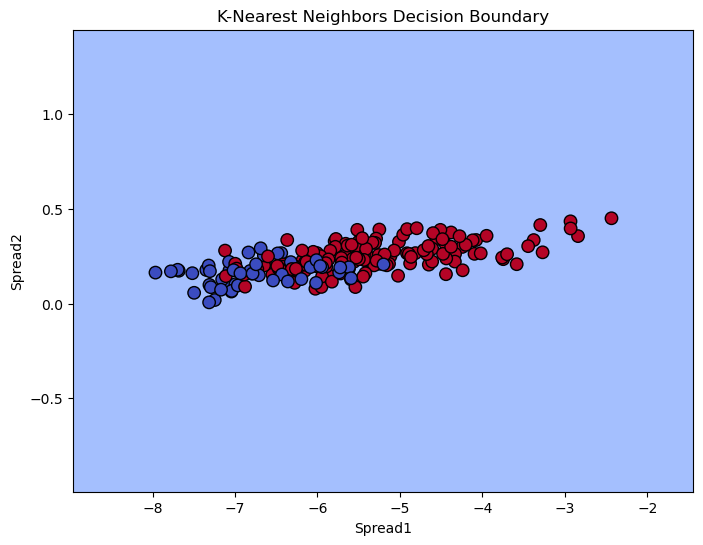

In [107]:
# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k',marker='o', s=80)
plt.title('K-Nearest Neighbors Decision Boundary')
plt.xlabel('Spread1')
plt.ylabel('Spread2')
plt.show()

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
models = {
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Machine' : SVC(kernel = 'sigmoid',random_state = 42),
    'Gaussian Naive Bayes' : GaussianNB(),
    'Random Forest' : RandomForestClassifier(oob_score = True),
    'KNN Classifier' : KNeighborsClassifier(n_neighbors=5)
}

In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score, f1_score

In [115]:
def score(models, X_train, Y_train, X_test, Y_test):
    score = {}
    for model_name in models:
        model = models[model_name]
# model training
        model.fit(X_train, Y_train)
# prediction on the test data
        Y_pred = model.predict(X_test)
# calculating the performance metrics
        acc = accuracy_score(Y_test, Y_pred) * 100
        con = confusion_matrix(Y_test, Y_pred)
        pre = precision_score(Y_test, Y_pred)
        rec = recall_score(Y_test, Y_pred)
        f1_sco = f1_score(Y_test, Y_pred)
# storing model performance
        score[model_name] = {
            'Accuracy' : acc,
            'Confusion matrix' : con,
            'Precision Score' : pre,
            'Recall' : rec,
            'f1_sco' : f1_sco
        }
    return score

In [116]:
model_score = score(models, X_train, y_train, X_test, y_test)
for model in model_score: 
    print(model)
    for metrics in model_score[model]:
        print(f'{metrics}:{model_score[model][metrics]}')
    print('\n-----------------------------------\n')

Logistic Regression
Accuracy:91.83673469387756
Confusion matrix:[[ 7  4]
 [ 0 38]]
Precision Score:0.9047619047619048
Recall:1.0
f1_sco:0.9500000000000001

-----------------------------------

Support Vector Machine
Accuracy:63.26530612244898
Confusion matrix:[[ 0 11]
 [ 7 31]]
Precision Score:0.7380952380952381
Recall:0.8157894736842105
f1_sco:0.775

-----------------------------------

Gaussian Naive Bayes
Accuracy:87.75510204081633
Confusion matrix:[[ 8  3]
 [ 3 35]]
Precision Score:0.9210526315789473
Recall:0.9210526315789473
f1_sco:0.9210526315789473

-----------------------------------

Random Forest
Accuracy:91.83673469387756
Confusion matrix:[[ 8  3]
 [ 1 37]]
Precision Score:0.925
Recall:0.9736842105263158
f1_sco:0.9487179487179489

-----------------------------------

KNN Classifier
Accuracy:89.79591836734694
Confusion matrix:[[ 7  4]
 [ 1 37]]
Precision Score:0.9024390243902439
Recall:0.9736842105263158
f1_sco:0.9367088607594938

-----------------------------------



C:\Users\RACY\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
